# **Health and Wellness** (CMSE 202 Project)

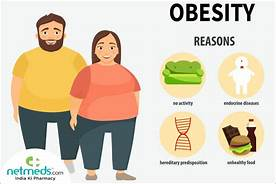

#### By: Deeya Patel, Shreyas Athreya, and Atticus Bartoli

## **Question**: 
What factors impact obesity the most? How do different strategies to alleviate obesity compare?

## **Data:**

***Source:***

Kaggle: https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels?resource=download&select=ObesityDataSet_raw_and_data_sinthetic.csv

In [1]:
import pandas as pd

obesity_df = pd.read_csv('Obesity_Data.csv', delimiter=',')
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


***What does the data show?*** 
* The data provides demographic information as well as lifestyle choices of a large sample of people from which we can pull information on what factors influence obesity the most. Further, we can then then find ways to alleviate obesity based on that information.

***Defining Unknowns:***
* Frequent consumption of high caloric foods (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Consumption of alcohol (CALC)
* Transportation used (MTRANS)
* NObeyesdad is to indicate the Weight Classification

## Methodology / Results

### ***What factors cause obesity?***

**Step 1:** Import all neccessary modules

In [2]:
import pandas as pd # already used to load in data above
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**Step 2:** Creating a correlation matrix using the data to see what factors impact obesity the most.

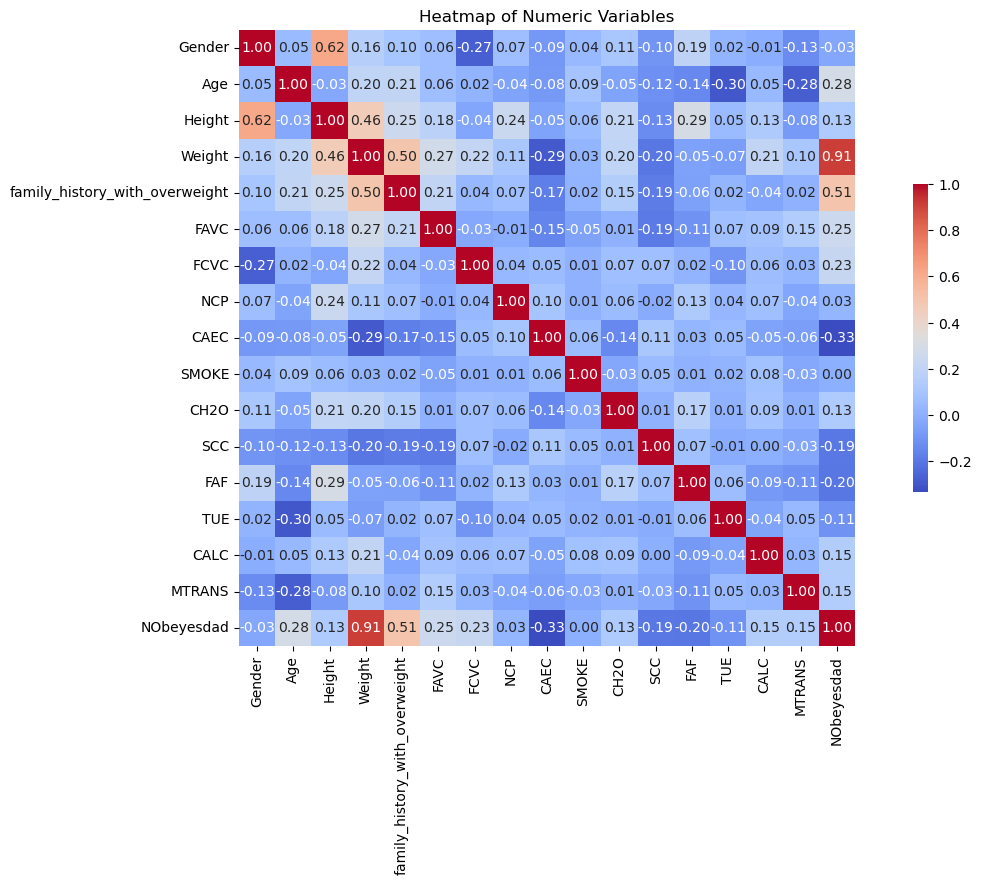

In [3]:
obesity_df1 = obesity_df

#unique_nobeyesdad_entries = obesity_df['NObeyesdad'].unique()
#unique_nobeyesdad_entries

columns_to_convert = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
columns_to_convert1 = ['CAEC', 'CALC']
obesity_df1[columns_to_convert] = obesity_df1[columns_to_convert].replace({'yes': 1.0, 'no': 0.0})
obesity_df1['Gender'] = obesity_df1['Gender'].replace({'Male': 1.0, 'Female': 0.0})
obesity_df1[columns_to_convert1] = obesity_df1[columns_to_convert1].replace({'Always': 1.0, 'Frequently': 0.67, 'Sometimes': 0.33, 'no': 0.0})
obesity_df1['MTRANS'] = obesity_df1['MTRANS'].replace({'Public_Transportation': 1, 'Automobile': 0.75, 'Motorbike': 0.5, 'Bike': 0.25, 'Walking': 0.0})
obesity_df1['NObeyesdad'] = obesity_df1['NObeyesdad'].replace({'Obesity_Type_III': 1.0, 'Obesity_Type_II': 0.8333, 'Obesity_Type_I': 0.6666, 'Overweight_Level_II': 0.5, 'Overweight_Level_I': 0.3333, 'Normal_Weight': 0.1666, 'Insufficient_Weight': 0.0})

obesity_df_clean = obesity_df1.dropna()
corr = obesity_df_clean.corr() 

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Heatmap of Numeric Variables')
plt.show()

#Significant variables for classification of weight are (above 0.2) : Age, *Family History, FAVC, FCVC, CAEC, FAF
#Significant variables for numerical weight are (above 0.2) : Age, *Height, *Family History, FAVC, FCVC, CAEC, CH20, SCC, CALC

**Step 3:** Using the correlation matrix pull some appropriate visualizations to characterize the features in the data that impact obesity the most.

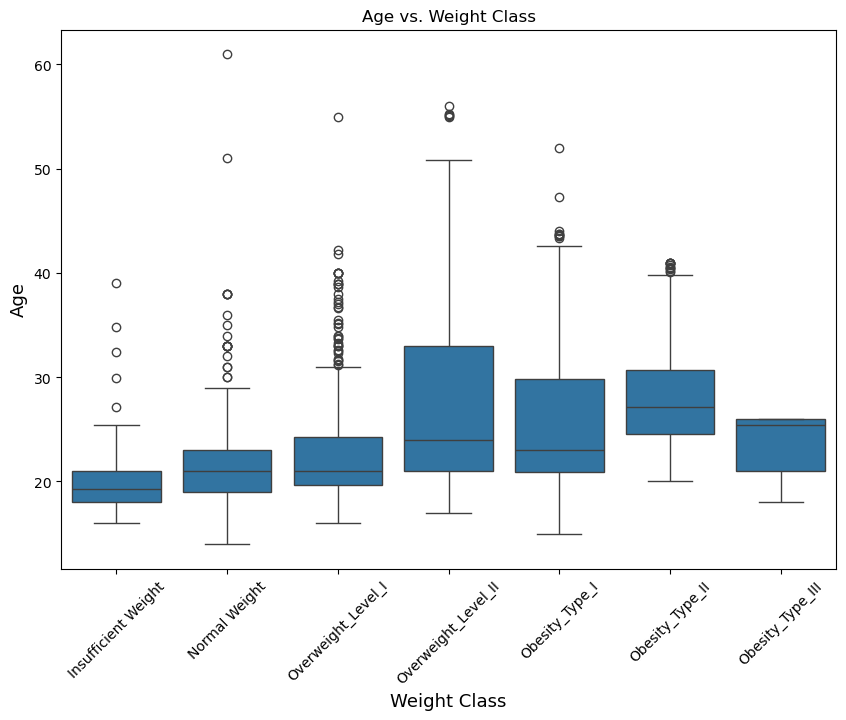

In [4]:
# This visualization is comparing age to weight class for individuals in the data set.

weight_class_mapping = {
    0.0: 'Insufficient Weight',
    0.1666: 'Normal Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

plt.figure(figsize=(10, 7))
sns.boxplot(x='NObeyesdad', y='Age', data=obesity_df1)
plt.title('Age vs. Weight Class')
plt.xticks(rotation=45) 
plt.xlabel('Weight Class', fontsize=13)
plt.ylabel('Age', fontsize=13)
plt.xticks(ticks=range(len(weight_class_mapping)), labels=list(weight_class_mapping.values()), fontsize=10)  # Set x-axis ticks to weight class names
plt.show()

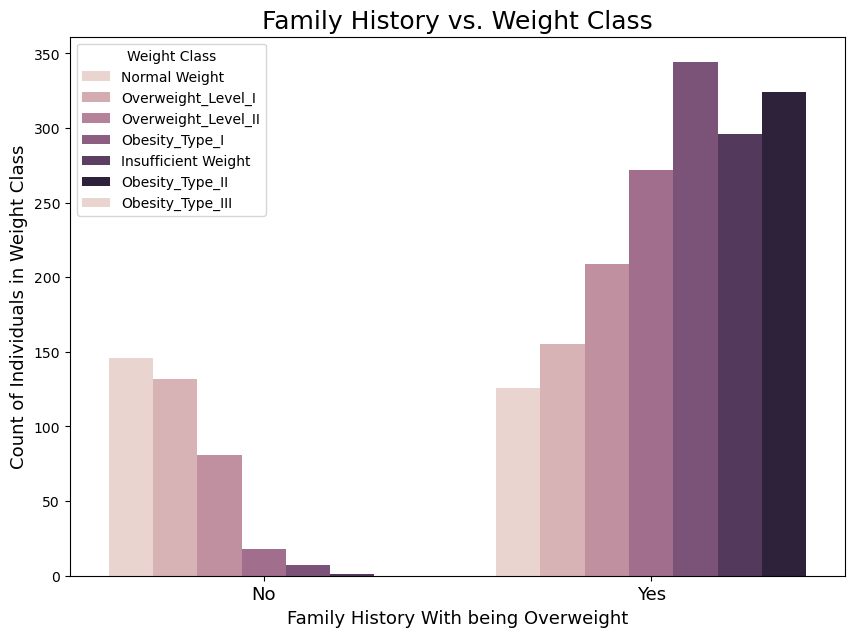

In [5]:
weight_class_mapping = {
    0.0: 'Insufficient Weight',
    0.1666: 'Normal Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

labels = ['No','Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=obesity_df1)
plt.title('Family History vs. Weight Class', fontsize=18)
plt.legend(title='Weight Class', labels=[weight_class_mapping[label] for label in obesity_df1['NObeyesdad'].unique()])
plt.xlabel('Family History With being Overweight', fontsize=13)
plt.xticks(x, labels, fontsize=13)
plt.ylabel('Count of Individuals in Weight Class', fontsize=13)
plt.show()

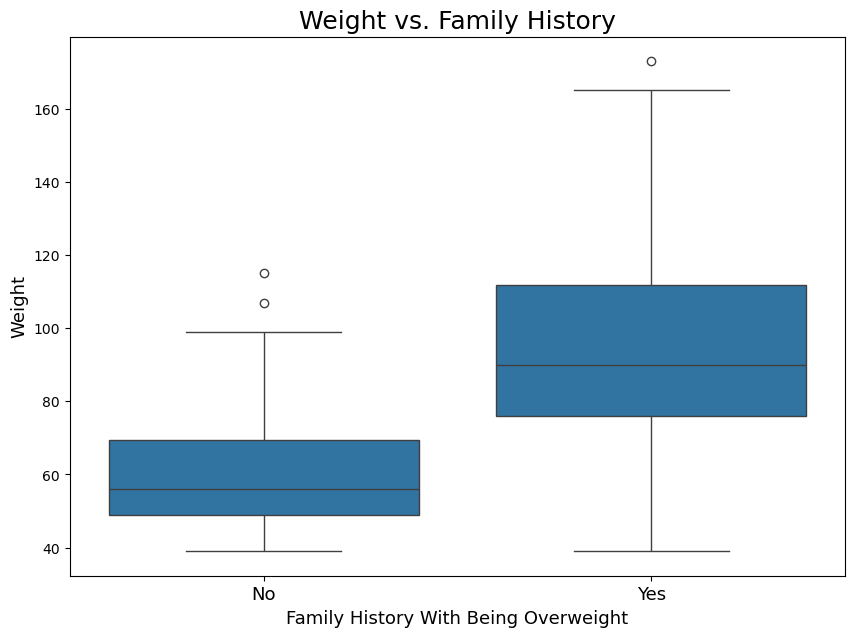

In [6]:
# Same as above... 0 indicates no family history with being overweight and 1 indicates there is a history.
labels1 = ['No','Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.boxplot(x='family_history_with_overweight', y='Weight', data=obesity_df1)
plt.title('Weight vs. Family History',fontsize = 18)
plt.xticks(x, labels1,fontsize = 13)
plt.xlabel('Family History With Being Overweight',fontsize=13)
plt.ylabel('Weight',fontsize=13)
plt.show()

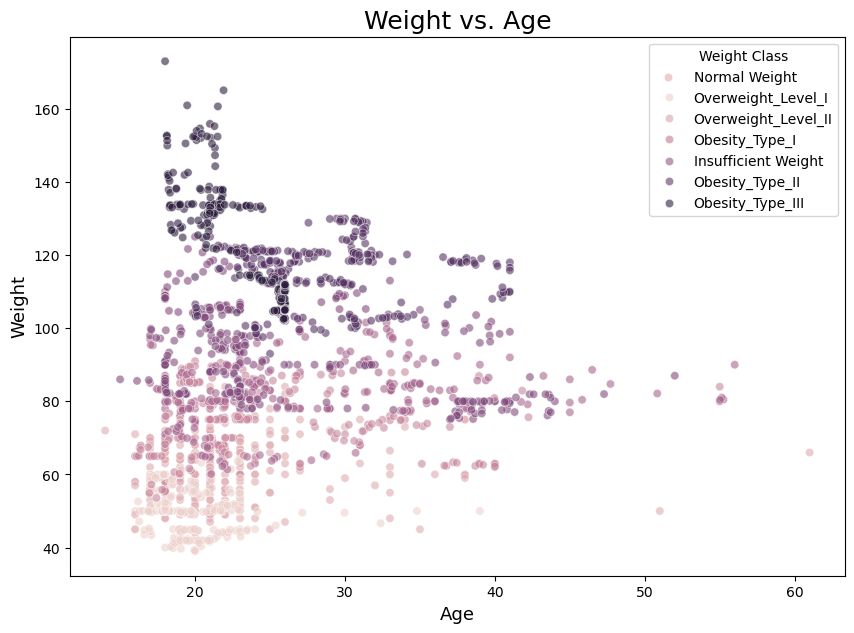

In [7]:
# Comparison graph of the weight vs. age

weight_class_mapping = {
    0.0: 'Insufficient Weight',
    0.1666: 'Normal Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Weight', data=obesity_df1, hue='NObeyesdad', alpha=0.6)
plt.title('Weight vs. Age', fontsize=18)
plt.legend(title='Weight Class', labels=[weight_class_mapping[label] for label in obesity_df1['NObeyesdad'].unique()])
plt.xlabel('Age', fontsize=13)
plt.ylabel('Weight', fontsize=13)
plt.show()

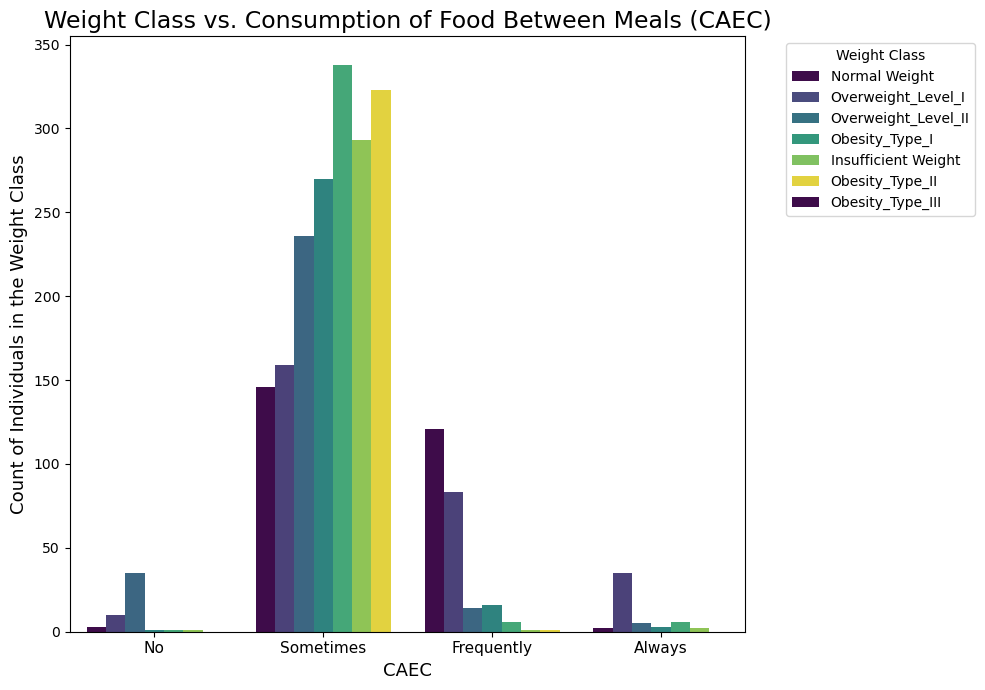

In [8]:
# Weight class consumption in relation to the frequency of consumption of food between meals

# Using bbox_to_anchor https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
weight_class_mapping = {
    0.0: 'Insufficient Weight',
    0.1666: 'Normal Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

labels5 = ['No', 'Sometimes', 'Frequently', 'Always']
x = [0, 1, 2, 3]

plt.figure(figsize=(10, 7))
sns.countplot(x='CAEC', hue='NObeyesdad', data=obesity_df1, palette='viridis')
plt.title('Weight Class vs. Consumption of Food Between Meals (CAEC)', fontsize=17)
plt.xticks(x, labels5, fontsize=11)
plt.legend(title='Weight Class', labels=[weight_class_mapping[label] for label in obesity_df1['NObeyesdad'].unique()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('CAEC', fontsize=13)
plt.ylabel('Count of Individuals in the Weight Class', fontsize=13)
plt.tight_layout()
plt.show()

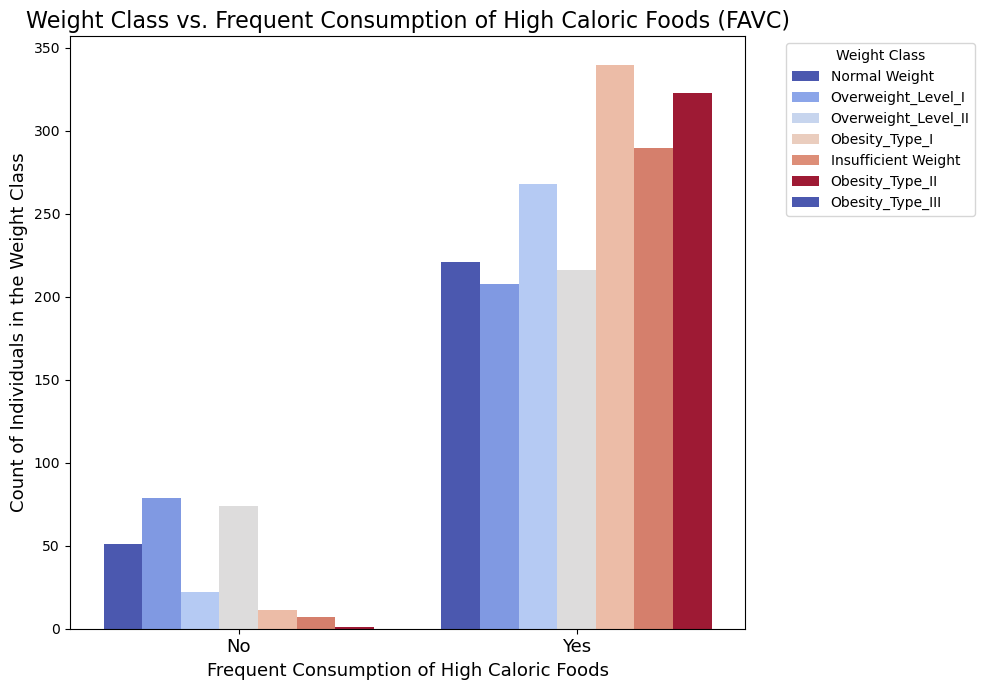

In [9]:
# Weight class in relation to the frequency of consumption of high caloric foods

weight_class_mapping = {
    0.0: 'Insufficient Weight',
    0.1666: 'Normal Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

labels2 = ['No', 'Yes']
x = [0, 1]

plt.figure(figsize=(10, 7))
sns.countplot(x='FAVC', hue='NObeyesdad', data=obesity_df1, palette='coolwarm')
plt.title('Weight Class vs. Frequent Consumption of High Caloric Foods (FAVC)', fontsize=16)
plt.xticks(x, labels2, fontsize=13)
plt.legend(title='Weight Class', labels=[weight_class_mapping[label] for label in obesity_df1['NObeyesdad'].unique()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Frequent Consumption of High Caloric Foods', fontsize=13)
plt.ylabel('Count of Individuals in the Weight Class', fontsize=13)
plt.tight_layout()
plt.show()

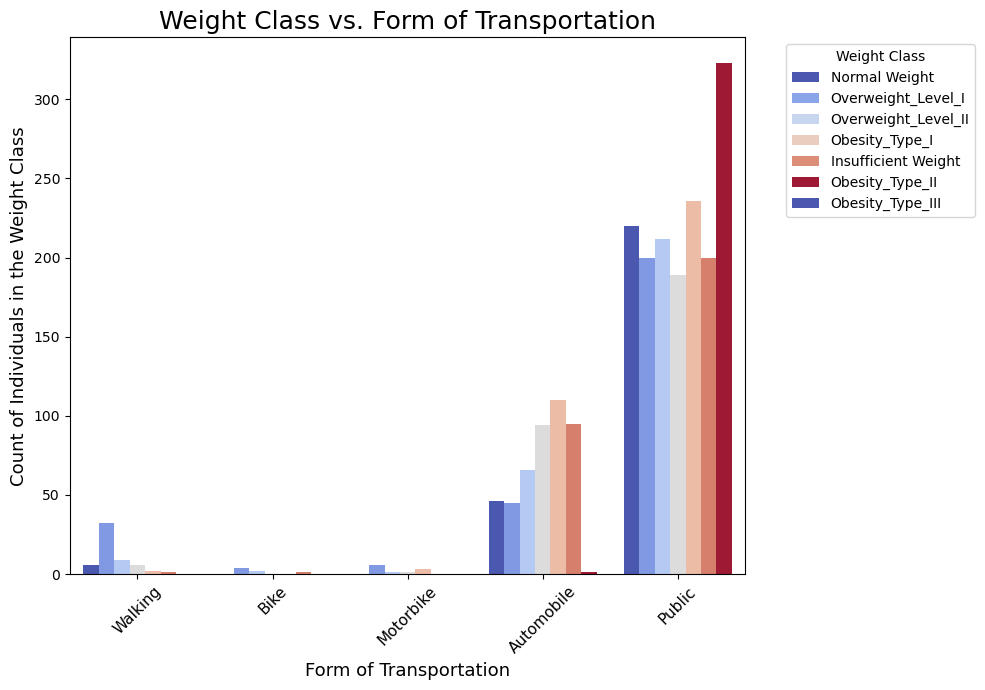

In [10]:
# Weight class in relation to the mode of transportation

weight_class_mapping = {
    0.0: 'Insufficient Weight',
    0.1666: 'Normal Weight',
    0.3333: 'Overweight_Level_I',
    0.5: 'Overweight_Level_II',
    0.6666: 'Obesity_Type_I',
    0.8333: 'Obesity_Type_II',
    1.0: 'Obesity_Type_III'}

labels3 = ['Walking', 'Bike', 'Motorbike', 'Automobile', 'Public']
x = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 7))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=obesity_df1, palette='coolwarm')
plt.title('Weight Class vs. Form of Transportation', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Weight Class', labels=[weight_class_mapping[label] for label in obesity_df1['NObeyesdad'].unique()], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(x, labels3, fontsize=11)
plt.xlabel('Form of Transportation', fontsize=13)
plt.ylabel('Count of Individuals in the Weight Class', fontsize=13)
plt.tight_layout()
plt.show()

**Step 4:** Creating an summary of the OLS regression results. This information can be used to determine if a feature is statistically significant as well as how well fit the model is for the data (using the R-squared).

In [11]:
# Define the independent and dependent variables
X = obesity_df1[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = obesity_df1['NObeyesdad']

# Add constant for the intercept term
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             NObeyesdad   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2527.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:00:54   Log-Likelihood:                 2518.3
No. Observations:                2111   AIC:                            -5003.
Df Residuals:                    2094   BIC:                            -4906.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [12]:
# Finding the significant features from the OLS regression summary above

p_values = model.pvalues
feature_names = X.columns
significant_features = feature_names[p_values < 0.05]
print("Significant Features (p-value < 0.05):", significant_features)

Significant Features (p-value < 0.05): Index(['const', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'NCP', 'CAEC', 'FAF', 'CALC',
       'MTRANS'],
      dtype='object')


**Step 5:** Creating a class to display some object-oriented programming for factors that cause obesity. In this class we use the most significant variables from the data we observed from the OLS regression summary above and then pulled those features in creating a class for person classification summaries.

In [13]:
class BMICalculator:
    def __init__(self, high_caloric_food_consumption, mode_of_transport, physical_activity_level,
                 family_history_overweight, gender, height, age, weight, NCP, CAEC, FAF, CALC, MTRANS):
        self.high_caloric_food_consumption = high_caloric_food_consumption
        self.mode_of_transport = mode_of_transport
        self.physical_activity_level = physical_activity_level
        self.family_history_overweight = family_history_overweight
        self.gender = gender
        self.height = height
        self.age = age
        self.weight = weight
        self.NCP = NCP
        self.CAEC = CAEC
        self.FAF = FAF
        self.CALC = CALC
        self.MTRANS = MTRANS
        self.bmi = self.calculate_bmi()
        self.obesity_level = self.calculate_obesity_level()

    def calculate_bmi(self):
        bmi = self.weight / (self.height ** 2)
        return round(bmi, 2)  # Round BMI to 2 decimal places

    def calculate_obesity_level(self):
        obesity_factor = (
            self.high_caloric_food_consumption +
            self.mode_of_transport +
            (1 - self.physical_activity_level) +
            self.family_history_overweight +
            self.gender +
            self.age / 100 +  # Normalize age
            self.NCP / 10 +  # Normalize NCP
            self.CAEC / 10 +  # Normalize CAEC
            self.FAF / 10 +  # Normalize FAF
            self.CALC / 10 +  # Normalize CALC
            self.MTRANS
        ) / 13  # Normalize the sum of factors
        return round(obesity_factor, 2)

    def get_weight_category(self):
        bmi = self.calculate_bmi()
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal weight"
        elif 24.9 <= bmi < 29.9:
            return "Overweight"
        elif 29.9 <= bmi < 34.9:
            return "Obesity (Class 1)"
        elif 34.9 <= bmi < 39.9:
            return "Obesity (Class 2)"
        else:
            return "Obesity (Class 3)"

    def print_summary(self):
        print("BMI Calculator Summary:")
        print("-"*30)
        print("High Caloric Food Consumption:", self.high_caloric_food_consumption)
        print("Mode of Transport:", self.mode_of_transport)
        print("Physical Activity Level:", self.physical_activity_level)
        print("Family History of Overweight:", self.family_history_overweight)
        print("Gender:", "Male" if self.gender == 0 else "Female")
        print("Height:", self.height, "m")
        print("Age:", self.age, "years")
        print("Weight:", self.weight, "kg")
        print("Number of Main Meals per Day (NCP):", self.NCP)
        print("Consumption of Food Between Meals (CAEC):", self.CAEC)
        print("Frequency of Physical Activity (FAF):", self.FAF)
        print("Consumption of Alcohol (CALC):", self.CALC)
        print("Mode of Transportation (MTRANS):", self.MTRANS)
        print("BMI:", self.bmi)
        print("Obesity Level:", self.obesity_level)
        print("Weight Category:", self.get_weight_category())

**Step 6**: Use the class above and create objects to display each weight class category type.

In [14]:
# Height is recorded in meters, age in years, and weight in kilograms to standardize
# Male is 0 and female is 1

object1 = BMICalculator(high_caloric_food_consumption=0.8, mode_of_transport=0.2, physical_activity_level=0.6, family_history_overweight=1, gender=0, 
    height=1.80, age=35, weight=90, NCP=3.5, CAEC=2.5, FAF=4.0, CALC=0.5, MTRANS=0.7)

object2 = BMICalculator(high_caloric_food_consumption=0.6, mode_of_transport=0.3, physical_activity_level=0.4, family_history_overweight=0, gender=1,
    height=1.65, age=28,  weight=65, NCP=2.5, CAEC=1.5, FAF=3.5, CALC=0.8, MTRANS=0.6)

object3 = BMICalculator(high_caloric_food_consumption=0.7, mode_of_transport=0.5, physical_activity_level=0.7, family_history_overweight=1, gender=1, 
    height=1.70, age=40,  weight=80,  NCP=3.0, CAEC=2.0, FAF=3.0, CALC=1.0, MTRANS=0.5)

object1.print_summary()
print()
object2.print_summary()
print()
object3.print_summary()

BMI Calculator Summary:
------------------------------
High Caloric Food Consumption: 0.8
Mode of Transport: 0.2
Physical Activity Level: 0.6
Family History of Overweight: 1
Gender: Male
Height: 1.8 m
Age: 35 years
Weight: 90 kg
Number of Main Meals per Day (NCP): 3.5
Consumption of Food Between Meals (CAEC): 2.5
Frequency of Physical Activity (FAF): 4.0
Consumption of Alcohol (CALC): 0.5
Mode of Transportation (MTRANS): 0.7
BMI: 27.78
Obesity Level: 0.35
Weight Category: Overweight

BMI Calculator Summary:
------------------------------
High Caloric Food Consumption: 0.6
Mode of Transport: 0.3
Physical Activity Level: 0.4
Family History of Overweight: 0
Gender: Female
Height: 1.65 m
Age: 28 years
Weight: 65 kg
Number of Main Meals per Day (NCP): 2.5
Consumption of Food Between Meals (CAEC): 1.5
Frequency of Physical Activity (FAF): 3.5
Consumption of Alcohol (CALC): 0.8
Mode of Transportation (MTRANS): 0.6
BMI: 23.88
Obesity Level: 0.32
Weight Category: Normal weight

BMI Calculator S

***Context:***
* NCP (Number of main meals per day)
    * Number seen is the amount of meals
* CAEC (Consumption of food between meals)
    * The higher the value the more consumption there is between meals.
    * 1 would be not so frequent consumption between meals and 4 would be heavy consumption between meals.
* FAF (Frequency of physical activity)
    * Higher the value the more frequent physical activity
* CALC (Consumption of Alcohol)
    * Higher the value the more alcohol they consume (more frequently)
* MTRANS (Mode of Transportation)
    * Lower MTRANS values: These could represent modes of transportation that require less physical activity, such as driving a car or using public transportation without much walking involved. (1: Sedentary transportation (e.g., car, bus) and 2: Moderate physical activity transportation (e.g., walking short distances, occasional cycling)
    * Higher MTRANS values: Conversely, higher values could represent modes of transportation that involve more physical activity, such as walking, cycling, or using stairs instead of elevators. (3: Active transportation (e.g., regular cycling, walking long distances) and 4: Highly active transportation (e.g., daily cycling, walking long distances regularly)

## Analysis and Conclusion

* R-squared value of the OLS regression model: 0.951
    * Indicates the model is very well suited for our data
* Based on the summary from the class above a healthy persons profile tends to consist of X, Y, Z... so to alleviate obesity one might exercise more, have 3 consistent meals throughout a day, lower their alcohol consumption, and the consumption of food in between meals should be reduced as well.